<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Modeling

---

## Objective
Predict the prices of properties in King County, Washington, which includes Seattle. Data dictionary [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r).

The goal of this homework is to help you strengthen your machine learning skills. 

Please try to recall and type as much code as possible, to help you remember it.

Use _111_ for random_state as needed.

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the data from the data folder

In [2]:
prices = pd.read_csv('./data/kc_house_data.csv')

## Inspect and EDA

In [3]:
prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
prices.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
prices.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
prices.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


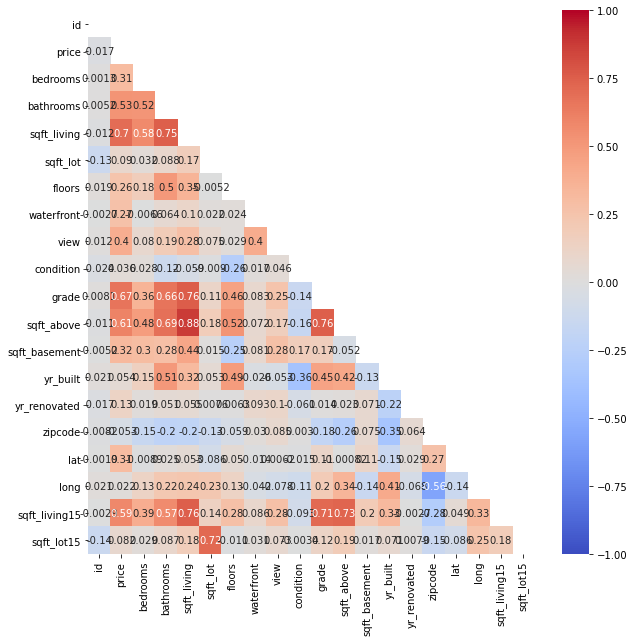

In [9]:
mask = np.zeros_like(prices.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    prices.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

## Split Your Data into Features (`X`) and Target (`y`)

For X, just keep a few columns that are highly correlated with _price_ and that aren't highly correlated with each other.

In [10]:
prices.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

Source: https://www.statology.org/pandas-unique-values-in-column/

In [11]:
prices.sqft_above.unique()

array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18

In [12]:
X = prices[['grade', 'sqft_above']]
y = prices['price']

## Create your training and test(holdout) sets

### Use _111_ for random_state as needed.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [15]:
X_train.head()

,grade,sqft_above
4785,8,2530
13738,7,1520
6254,8,2480
12709,7,790
12466,8,1450


In [16]:
y_train.head()

4785     429000.0
13738    252000.0
6254     409124.0
12709    425000.0
12466    399950.0
Name: price, dtype: float64

### Use a Linear Regression model to predict price

#### Import sklearn classes and functions in the cell below

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr

LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

#### What are the model coefficients?

In [20]:
lr.coef_

array([1.50291195e+05, 1.01988905e+02])

#### Interpret them

A one unit increase in square feet above ground is associated with a $102 increase in price, holding grade constant.

A one unit increase in grade is associated with a $150,291 increase in price, holding grade constant.

Source: https://www.calculator.net/scientific-notation-calculator.html

#### Evaluate your model predictions on the test set using RMSE

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([ 425571.27304393,  376616.59881695,  521440.84340512, ...,
        641135.36710407,  368457.48644578, 1211335.9708048 ])

In [23]:
mean_absolute_error(y_test, y_pred)

172445.93288743173

In [24]:
mean_squared_error(y_test, y_pred)

76924080543.48685

In [25]:
mean_squared_error(y_test, y_pred, squared = False)

277351.90740913764

In [26]:
lr.score(X_test, y_test)

0.4775862874142215

#### How does that model compare to a null model?

In [27]:
from sklearn.dummy import DummyRegressor

In [28]:
dr = DummyRegressor()

In [29]:
dr.fit(X_train, y_train)

DummyRegressor()

In [30]:
null_preds = dr.predict(X_test)
null_preds

array([538702.04139675, 538702.04139675, 538702.04139675, ...,
       538702.04139675, 538702.04139675, 538702.04139675])

In [31]:
mean_absolute_error(y_test, null_preds)

238875.63238255662

In [32]:
mean_squared_error(y_test, null_preds)

147278169452.09427

In [33]:
mean_squared_error(y_test, null_preds, squared = False)

383768.3799534483

In [34]:
dr.score(X_test, y_test)

-0.00020870893360935838

Linear regression is a better model.

You have a nice, interpretable model with a few features. Great! This is something you should create with any regression problem. Now let's try to make a better performing model.

---
### Change X to be all features except for price, id, and date

In [35]:
prices.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [36]:
X = prices[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [37]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Grid search over Ridge models with this larger set of features to find a good value for alpha

First, because Ridge uses regularization that is distance-based, we should scale our features. You can use a pipeline if you like.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss = StandardScaler()

In [41]:
X_train_scaled = ss.fit_transform(X_train, y_train)
X_train_scaled

array([[-0.39088815,  0.50104927,  0.49102002, ...,  0.06562215,
         0.51939608, -0.11856576],
       [-0.39088815, -0.47279152, -0.03138369, ..., -1.017876  ,
        -0.53503297, -0.16995029],
       [ 1.73668272,  1.47489006,  1.35080945, ...,  0.4267882 ,
         0.50475123, -0.15994364],
       ...,
       [ 0.67289728,  0.50104927, -0.27081872, ...,  1.40406104,
        -0.22749116, -0.27549493],
       [ 1.73668272, -0.79740512, -0.41230306, ...,  0.07978552,
        -0.76935054, -0.20175977],
       [-0.39088815, -0.47279152, -0.20551826, ...,  1.02164993,
        -0.43251904,  5.81932467]])

In [42]:
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[ 0.67289728, -0.47279152,  0.48013661, ...,  0.06562215,
         0.18256458, -0.15618201],
       [-1.45467359, -0.79740512, -1.00000723, ...,  0.27099108,
        -1.20869597, -0.40729791],
       [ 0.67289728,  0.50104927,  0.54543707, ...,  0.2072559 ,
         0.25578882, -0.33301494],
       ...,
       [-1.45467359, -0.14817793,  0.21893475, ...,  1.32616248,
         0.43152699, -0.21797493],
       [-0.39088815, -1.44663231, -1.08707451, ..., -0.81958876,
        -1.15011658, -0.20117544],
       [ 1.73668272,  2.12411725,  2.73300259, ..., -0.52215789,
         2.76005781, -0.13594958]])

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
params = {'alpha' : [.01, .1, 1, 10, 100]}

In [45]:
gs = GridSearchCV(estimator = Ridge(), param_grid = params, n_jobs =-1)

In [46]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

#### Check out the results of your grid searching

In [47]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028500,0.006475,0.004639,0.005524,0.01,{'alpha': 0.01},0.700871,0.684268,0.689685,0.697932,0.712252,0.697001,0.009634,5
1,0.020422,0.010814,0.004230,0.006065,0.1,{'alpha': 0.1},0.700870,0.684268,0.689685,0.697932,0.712252,0.697002,0.009634,4
2,0.018909,0.000964,0.001103,0.000919,1,{'alpha': 1},0.700868,0.684270,0.689688,0.697930,0.712254,0.697002,0.009634,3
3,0.018645,0.002459,0.000000,0.000000,10,{'alpha': 10},0.700838,0.684284,0.689722,0.697916,0.712276,0.697007,0.009629,2
4,0.021877,0.012506,0.003129,0.006259,100,{'alpha': 100},0.700526,0.684407,0.690020,0.697748,0.712470,0.697034,0.009588,1


In [48]:
gs.score(X_test_scaled, y_test)

0.6956422402254019

#### What was the best value for alpha?

In [49]:
gs.best_params_

{'alpha': 100}

#### Did regularization help much?

In [50]:
rr = Ridge(alpha = 100)
rr.fit(X_train, y_train)
rr.score(X_test, y_test)

0.6907916030932475

Doesn't look like it really changed much...

#### How does the best Ridge model with lots of features perform relative to the vanilla linear regression model with two features?



It performs quite a bit better than linear regression.

#### What other features do you wish you had?

type of property (condo, townhouse, single family residence, commercial, etc.), what types of amenities are available (pool, laundry, etc.), length of time on the market

___
#### Decision Tree Regressor

Fit a decision tree model with the defaults and test it on the test set

In [51]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [52]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
mean_squared_error(y_test, tree.predict(X_test), squared=False).round()

187630.0

In [54]:
mean_squared_error(y_train, tree.predict(X_train), squared=False).round()

9316.0

In [55]:
tree.score(X_test, y_test)

0.760911358525282

#### How did that model perform?

This performed better than either linear regression or grid search.

___
#### Gradient Boosting Regressor

Fit a gradient boosting algorithm with the defaults and test it on the test set.

#### How did that model perform?

---
## Bonus #1
GridSearch earch over a few GradientBoosting Regression hyperparameters to try to improve your performance.

Did you find a better model?

---
## Bonus #2
Engineer features by hand or use polynomial features to try to improve you model. You may find you have more features than you would like. You can drop features automatically with scikit-learn's [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) class. 

You could try to use just the first 3 digits of zip codes as different categories.